In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def load_data(pathfile):
    df = pd.read_csv(pathfile)
    df_ISPU = df[['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2','categori']]
    # Assuming 'df' is your original DataFrame

    # First, convert 'tanggal' to datetime
    df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])

    # Then, convert the columns to numeric, replacing invalid values with NaN
    df_ISPU['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
    df_ISPU['so2'] = pd.to_numeric(df['so2'], errors='coerce')
    df_ISPU['co'] = pd.to_numeric(df['co'], errors='coerce')
    df_ISPU['o3'] = pd.to_numeric(df['o3'], errors='coerce')
    df_ISPU['no2'] = pd.to_numeric(df['no2'], errors='coerce')
    
    
    #select where categori is SEDANG, BAIK, TIDAK SEHAT, SANGAT TIDAK SEHAT, BERBAHAYA

    df_ISPU = df_ISPU[df_ISPU['categori'].isin(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'BERBAHAYA'])]

    print(df_ISPU.head())

    #rename SANGAT TIDAK SEHAT and BERBAHAYA to TIDAK SEHAT

    df_ISPU['categori'] = df_ISPU['categori'].replace(['SANGAT TIDAK SEHAT', 'BERBAHAYA'], 'TIDAK SEHAT')
    return df_ISPU

In [5]:
filepath='/Users/rianrachmanto/pypro/project/Jakarta-Air-Quality-Prediction/data/raw/merged_data.csv'
df_ispu=load_data(filepath)

     tanggal             stasiun  pm10  so2    co    o3   no2 categori
0 2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   SEDANG
1 2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0     BAIK
2 2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0     BAIK
3 2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0     BAIK
4 2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0     BAIK


<ipython-input-4-3949e2a2fedb>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])
<ipython-input-4-3949e2a2fedb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])
<ipython-input-4-3949e2a2fedb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISPU['pm10'] = pd.to

In [6]:
def data_checking(df_ispu):
    print(df_ispu.shape)
    print(df_ispu.info())
    print(df_ispu.describe())
    print(df_ispu.isnull().sum())
    
    #plot boxplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(data=df_ispu, x='pm10', ax=axes[0])
    sns.boxplot(data=df_ispu, x='so2', ax=axes[0])
    sns.boxplot(data=df_ispu, x='co', ax=axes[1])
    sns.boxplot(data=df_ispu, x='o3', ax=axes[0])
    sns.boxplot(data=df_ispu, x='no2', ax=axes[1])
    plt.show()

    return df_ispu

(18105, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 0 to 21521
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   18105 non-null  datetime64[ns]
 1   stasiun   18034 non-null  object        
 2   pm10      17352 non-null  float64       
 3   so2       17569 non-null  float64       
 4   co        17744 non-null  float64       
 5   o3        17512 non-null  float64       
 6   no2       17615 non-null  float64       
 7   categori  18105 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB
None
               pm10           so2            co            o3           no2
count  17352.000000  17569.000000  17744.000000  17512.000000  17615.000000
mean      52.736111     17.839604     21.641625     65.080973     12.780698
std       19.443753     12.454466     13.930844     37.248320     10.846974
min        2.000000      0.000000      0.

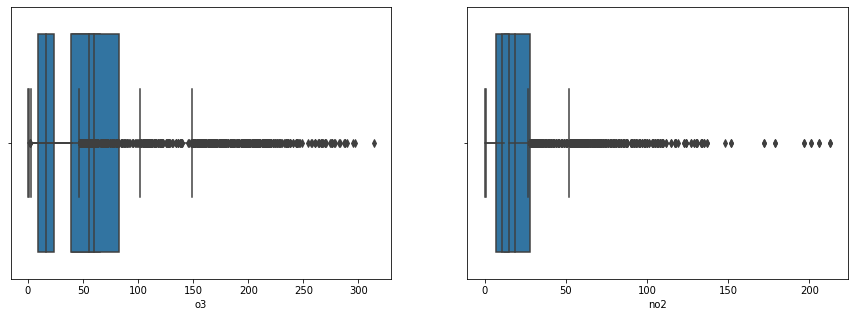

,tanggal,stasiun,pm10,so2,co,o3,no2,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,BAIK
...,...,...,...,...,...,...,...,...
21517,2021-11-26,DKI5 (Kebon Jeruk) Jakarta Barat,32.0,16.0,7.0,15.0,20.0,SEDANG
21518,2021-11-27,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,13.0,7.0,18.0,22.0,BAIK
21519,2021-11-28,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,12.0,2.0,16.0,8.0,BAIK
21520,2021-11-29,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,13.0,3.0,13.0,9.0,BAIK


In [7]:
data_checking(df_ispu)

In [8]:
#import simpleimputer
from sklearn.impute import SimpleImputer
#import forest isolation
from sklearn.ensemble import IsolationForest

def eda(df_ispu):
    #fill mising values of stasiun with "unknown"
    df_ispu['stasiun'].fillna('unknown', inplace=True)
    

    #impute all numerical columns with mean
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']] = imp_mean.transform(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])

    #remove outliers usong isolation forest
    clf = IsolationForest(random_state=0).fit(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu['outlier'] = clf.predict(df_ispu[['pm10', 'so2', 'co', 'o3', 'no2']])
    df_ispu = df_ispu[df_ispu['outlier'] != -1]
    df_ispu.drop('outlier', axis=1, inplace=True)

    

    print(df_ispu.isnull().sum())

    return df_ispu

In [9]:
eda(df_ispu)

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


<ipython-input-8-c7503dce135a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ispu.drop('outlier', axis=1, inplace=True)


,tanggal,stasiun,pm10,so2,co,o3,no2,categori
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,BAIK
5,2010-01-06,DKI1 (Bunderan HI),30.0,3.0,22.0,19.0,11.0,BAIK
...,...,...,...,...,...,...,...,...
21517,2021-11-26,DKI5 (Kebon Jeruk) Jakarta Barat,32.0,16.0,7.0,15.0,20.0,SEDANG
21518,2021-11-27,DKI5 (Kebon Jeruk) Jakarta Barat,22.0,13.0,7.0,18.0,22.0,BAIK
21519,2021-11-28,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,12.0,2.0,16.0,8.0,BAIK
21520,2021-11-29,DKI5 (Kebon Jeruk) Jakarta Barat,15.0,13.0,3.0,13.0,9.0,BAIK


In [10]:
def featuring(df_ispu):
    # group by date and aggregate by mean
    df_grouped = df_ispu.groupby('tanggal')[['pm10', 'so2', 'co', 'o3', 'no2']].mean().reset_index()
    print(df_grouped.head())

    #plot time series for all features into 5 subplots
    fig, axes = plt.subplots(5, 1, figsize=(15, 15))
    axes[0].plot(df_grouped['tanggal'], df_grouped['pm10'])
    axes[0].set_title('pm10')
    axes[1].plot(df_grouped['tanggal'], df_grouped['so2'])
    axes[1].set_title('so2')
    axes[2].plot(df_grouped['tanggal'], df_grouped['co'])
    axes[2].set_title('co')
    axes[3].plot(df_grouped['tanggal'], df_grouped['o3'])
    axes[3].set_title('o3')
    axes[4].plot(df_grouped['tanggal'], df_grouped['no2'])
    axes[4].set_title('no2')
    plt.tight_layout()
    plt.show()
    return df_grouped





     tanggal  pm10  so2    co    o3   no2
0 2010-01-01  60.0  4.0  73.0  27.0  14.0
1 2010-01-02  32.0  2.0  16.0  33.0   9.0
2 2010-01-03  27.0  2.0  19.0  20.0   9.0
3 2010-01-04  22.0  2.0  16.0  15.0   6.0
4 2010-01-05  25.0  2.0  17.0  15.0   8.0


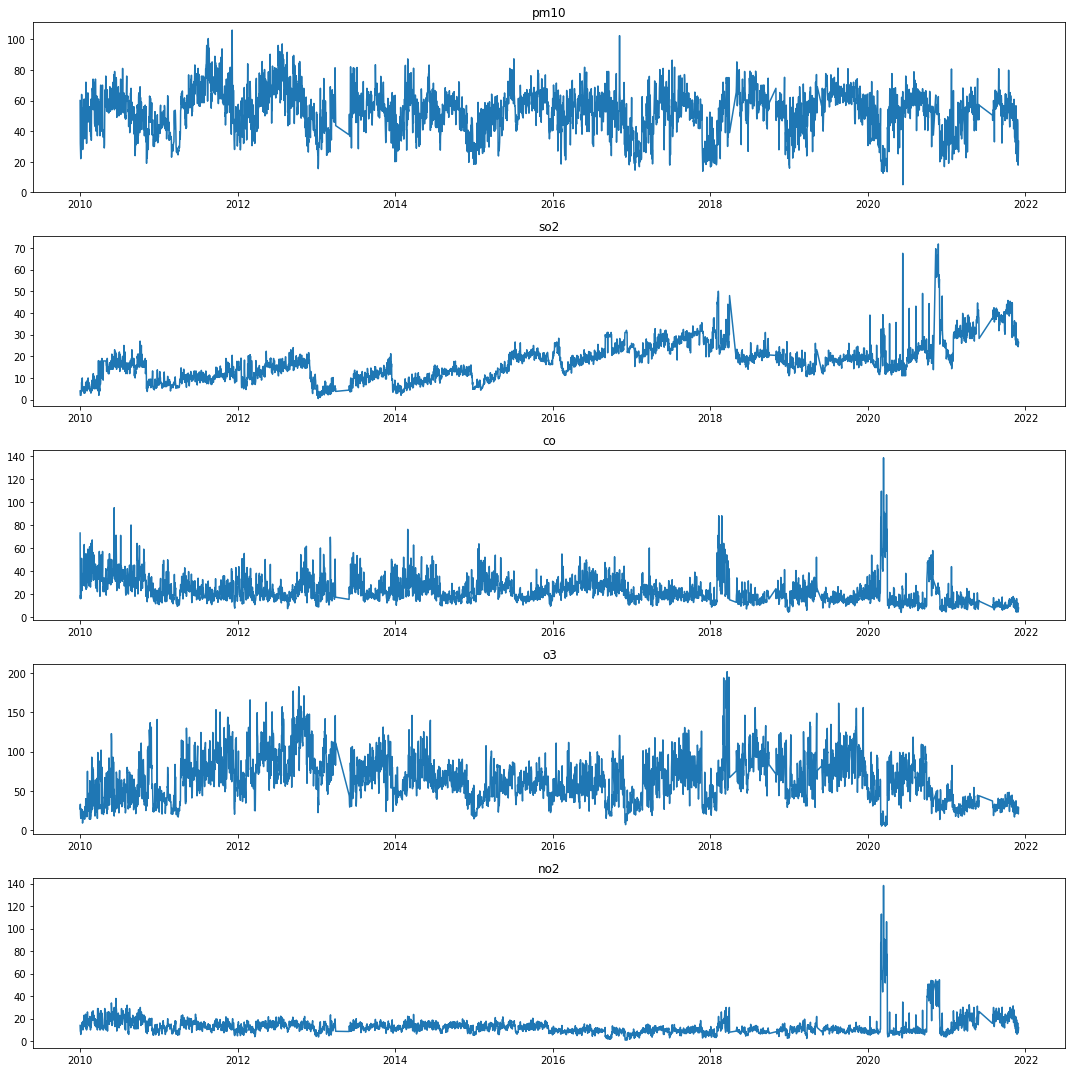

In [11]:
df_grouped=featuring(df_ispu)

In [12]:
df_lstm=df_grouped[['co']]
df_lstm

,co
0,73.0
1,16.0
2,19.0
3,16.0
4,17.0
...,...
4128,12.2
4129,8.2
4130,4.4
4131,6.6


In [13]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
X_lstm = scaler.fit_transform(df_lstm)

In [15]:
print(X_lstm.shape)

(4133, 1)


In [16]:
#import train test split
from sklearn.model_selection import train_test_split


In [17]:
#train_test_split without shuffling
train,test = train_test_split(X_lstm,test_size=0.2,shuffle=False)

In [18]:
def create_dataset(dataset, look_back=1):
  '''
  Fungsi untuk membuat data dalam bentuk look back

  Attribut
  dataset : object
    dataset yang akan dipakai untuk membuat data look back
  look_back : int
    banyaknya data yang akan menjadi look back
  '''
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1): 
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [19]:
# Membuat data look back untuk dataset train  dan test
look_back =5
X_train_lstm, Y_train_lstm = create_dataset(train, look_back)
X_test_lstm, Y_test_lstm = create_dataset(test, look_back)


In [20]:
print("X_train LSTM Shape", X_train_lstm.shape)
print("X_test LSTM Shape", X_test_lstm.shape)

X_train LSTM Shape (3300, 5)
X_test LSTM Shape (821, 5)


In [21]:
# Merubah shape untuk menambahkan satu dimensi kedalam data X/Fitur
# (X, X) -> (X, 1, X)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

In [22]:
print("re-shape, X_train_lstm", X_train_lstm.shape)
print("re-shape, X_test_lstm", X_test_lstm.shape)

re-shape, X_train_lstm (3300, 1, 5)
re-shape, X_test_lstm (821, 1, 5)


In [23]:
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.losses import mean_squared_error
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [24]:
import tensorflow as tf

In [25]:
# Membuat model sequential dengan 1 LSTM dan output
# Banyaknya Unit dari LSTM dipilih menggunakan Keras Tuner

def build_model(hp):
  with tf.device('/CPU:0'):
    model = Sequential()
    model.add(LSTM(hp.Int('units',min_value=32,max_value=512,step=32), input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam',metrics = [tf.keras.metrics.MeanSquaredError()])
    return model

In [26]:
# Mendefinisikan jenis pencarian yang akan digunakan untuk mencari parameter terbaik
tuners= RandomSearch(
        build_model,
        objective='mean_squared_error',
        max_trials=10,
        executions_per_trial=1
        )

In [27]:
# Mulai melakukan pelatihan serta mencari hasil yang paling optimal
tuners.search(
        x=X_train_lstm,
        y=Y_train_lstm,
        epochs=100,
        batch_size=64,
)

Trial 10 Complete [00h 01m 05s]
mean_squared_error: 0.0033295287285000086

Best mean_squared_error So Far: 0.003324777353554964
Total elapsed time: 00h 11m 13s
INFO:tensorflow:Oracle triggered exit


In [28]:
tuners.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="mean_squared_error", direction="min")

Trial 07 summary
Hyperparameters:
units: 320
Score: 0.003324777353554964

Trial 09 summary
Hyperparameters:
units: 224
Score: 0.0033295287285000086

Trial 02 summary
Hyperparameters:
units: 192
Score: 0.0033318903297185898

Trial 05 summary
Hyperparameters:
units: 32
Score: 0.0033330877777189016

Trial 08 summary
Hyperparameters:
units: 448
Score: 0.003333587432280183

Trial 04 summary
Hyperparameters:
units: 512
Score: 0.0033349317964166403

Trial 01 summary
Hyperparameters:
units: 384
Score: 0.003334979061037302

Trial 00 summary
Hyperparameters:
units: 352
Score: 0.0033360766246914864

Trial 03 summary
Hyperparameters:
units: 64
Score: 0.0033364787232130766

Trial 06 summary
Hyperparameters:
units: 480
Score: 0.0033379883971065283


In [29]:
# Menggunakan model yang paling optimal
best_model = tuners.get_best_models(num_models=1)[0]

In [30]:
print(X_test_lstm.shape)

(821, 1, 5)


In [31]:
X_test_lstm.shape

(821, 1, 5)

In [32]:
testPredict = best_model.predict(X_test_lstm) # Prediksi test data


26/26 [==============================] - 0s 5ms/step


In [33]:
testPredictInv = scaler.inverse_transform(testPredict)
testYInv = scaler.inverse_transform([Y_test_lstm])

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

testPredict = best_model.predict(X_test_lstm) # Prediksi test data

# Mengembalikan transform skalar ke semula
testPredictInv = scaler.inverse_transform(testPredict)
testYInv = scaler.inverse_transform([Y_test_lstm])

print('Hasil Akurasi Pelatihan Dengan LSTM Terhadap Test Data')
print(f"Nilai RMSE : {mean_squared_error(testYInv[0], testPredictInv, squared=False)}")
print(f"Nilai MAE : {mean_absolute_error(testYInv[0], testPredictInv)}")
print(f"Nilai R2  : {r2_score(testYInv[0], testPredictInv)}")


26/26 [==============================] - 0s 4ms/step
Hasil Akurasi Pelatihan Dengan LSTM Terhadap Test Data
Nilai RMSE : 8.4354559836718
Nilai MAE : 5.45293775749129
Nilai R2  : 0.6389740747311132


In [35]:
num_features = 1  # Extract number of features from the shape of X_train_lstm
trainPredict = best_model.predict(X_train_lstm)  # Make predictions on the training data
trainPredictInv = scaler.inverse_transform(trainPredict.reshape(-1, num_features))  # Inverse transform the predicted values


104/104 [==============================] - 0s 4ms/step


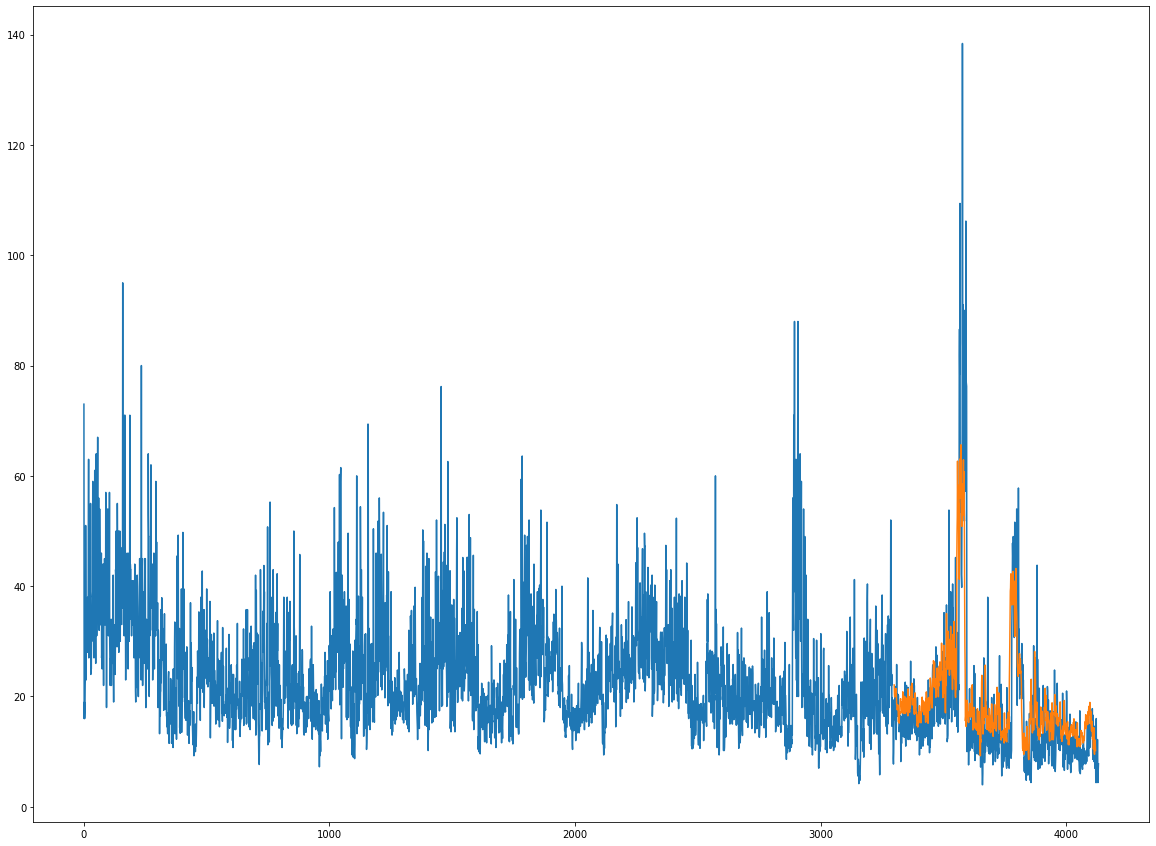

In [36]:
plt.figure(figsize=(20,15))
plt.plot(scaler.inverse_transform(X_lstm))
plt.plot(np.arange(len(trainPredictInv),len(trainPredictInv)+len(testPredictInv)),testPredictInv)
plt.show()

In [37]:
from itertools import chain

In [38]:
# Membuat fungsi untuk melakukan forecasting dengan menggunakan model LSTM yang sudah dibuat
def try_forecasting(rangedate=10):
  #Mengambil beberapa data terakhir sebagai awal masukan
  newlist = list(chain.from_iterable(X_lstm[-look_back:].tolist())) 
  newpredlist = []
  for i in range(rangedate):
    newpred = best_model.predict([[newlist]]) # Prediksi masukan
    newlist.pop(0) # Menghapus angka pertama dalam list
    newlist.extend(newpred.tolist()[0]) # Memasukkan hasil prediksi kedalam list paling belakang
    newpredlist.append(newpred) # Memasukkan hasil prediksi kedalam list

  z = [a.tolist() for a in newpredlist] # List comprehension
  arrayz = np.array(z) # Mengubah jadi array
  squeezez = np.squeeze(arrayz, axis=1) # Squeeze dimensi
  trainPredictInv2 = scaler.inverse_transform(squeezez) # mengembalikan nilai kesemula

  plt.figure(figsize=(20,15))
  plt.plot(scaler.inverse_transform(X_lstm)) # Plot data asli
  plt.plot(np.arange(len(X_lstm),len(X_lstm)+rangedate),trainPredictInv2) # Plot data masa depan
  plt.plot(np.arange(len(trainPredictInv),len(trainPredictInv)+len(testPredictInv)),testPredictInv) # plot prediksi data test
  plt.show()

1/1 [==============================] - 0s 31ms/step


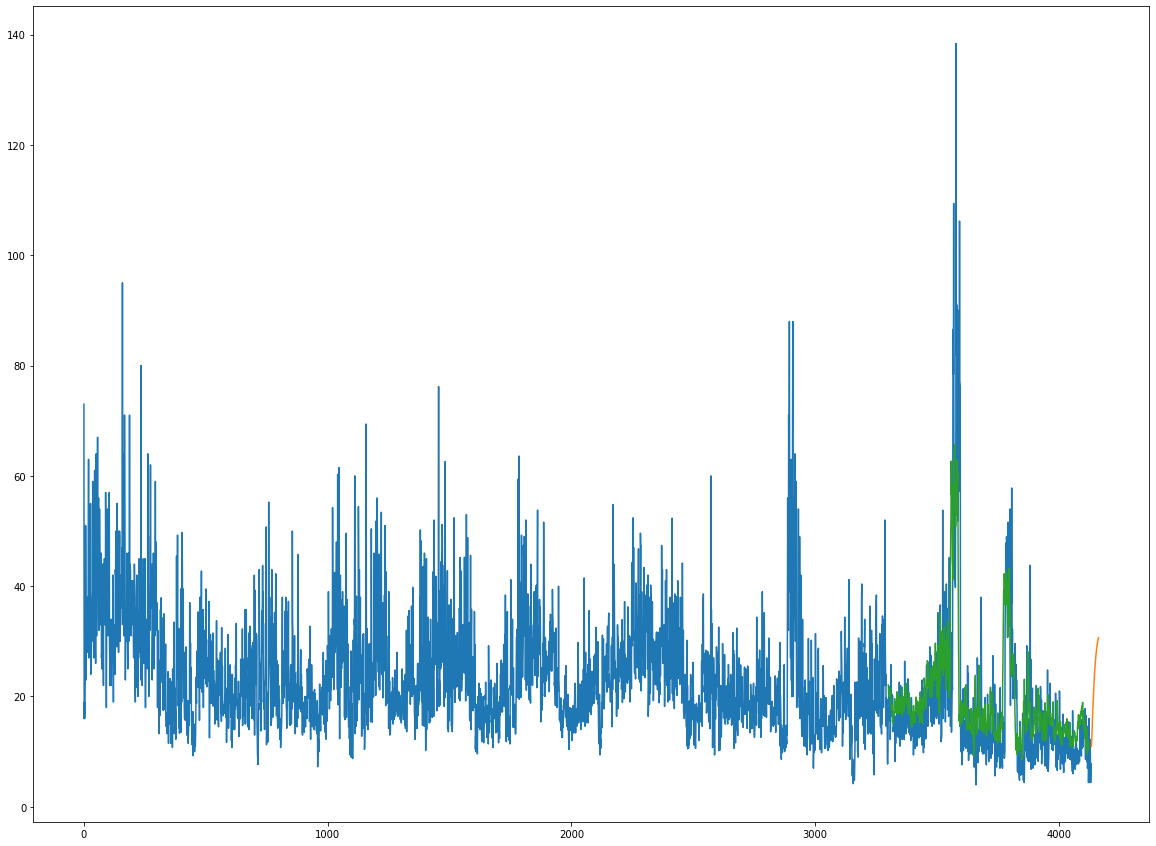

In [39]:
try_forecasting(30)